In [3]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd

import gcsfs
import zarr

First import the masks into the notebook, to find them follow the path used to open them in the code below.

In [4]:
#importing .nc files which contain the masks, in this notebook I named them mask_CM4 and mask_ESM4
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')

To see the names of the individual masks in the dataset you can just enter the name of the data set and it shows every masks name. This is needed for plotting the masks. The orog data set can be ignored for plotting as it is there to fit all of the masks to the entire continent of Antarctic

In [5]:
mask_CM4

<xarray.Dataset>
Dimensions:        (lat: 180, lon: 288)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon            (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Data variables:
    orog           (lat, lon) float32 ...
    ross_CM4       (lat, lon) float32 ...
    filchner_CM4   (lat, lon) float32 ...
    peninsula_CM4  (lat, lon) float32 ...
    loweast_CM4    (lat, lon) float32 ...
    lowwest_CM4    (lat, lon) float32 ...
    plateau_CM4    (lat, lon) float32 ...

In [6]:
mask_ESM4

<xarray.Dataset>
Dimensions:         (lat: 180, lon: 288)
Coordinates:
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Data variables:
    orog            (lat, lon) float32 ...
    ross_ESM4       (lat, lon) float32 ...
    filchner_ESM4   (lat, lon) float32 ...
    peninsula_ESM4  (lat, lon) float32 ...
    loweast_ESM4    (lat, lon) float32 ...
    lowwest_ESM4    (lat, lon) float32 ...
    plateau_ESM4    (lat, lon) float32 ...

Now that the masks are imported and we have the names we can use them to plot temperature data on them.

In [7]:
#Importing temperature data for ESM4, and CM4
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)



In [8]:
#Isolating the temperature data from the data set to use on plot
temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp

To plot data over the mask you take the data set you want to use then multiply it by the mask. You have to take the name of the data set in this scenario I had named it mask_CM4 when I imported it, then do .maskname. I used lowwest_CM4 for this one. Then after multiplying the two, you want to take that variable and mean the other variables so the data is only lat and lon.

In [13]:

lowwest_temp=(temp_CM4*(mask_CM4.lowwest_CM4))
lowwest_test=lowwest_temp.mean(dim='time').mean(dim='pfull')

In [14]:
lowwest_test

<xarray.DataArray (lat: 180, lon: 288)>
dask.array<mean_agg-aggregate, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4

Now we have our variable lowwest_test which is ready to be plotted which can be done as follows:

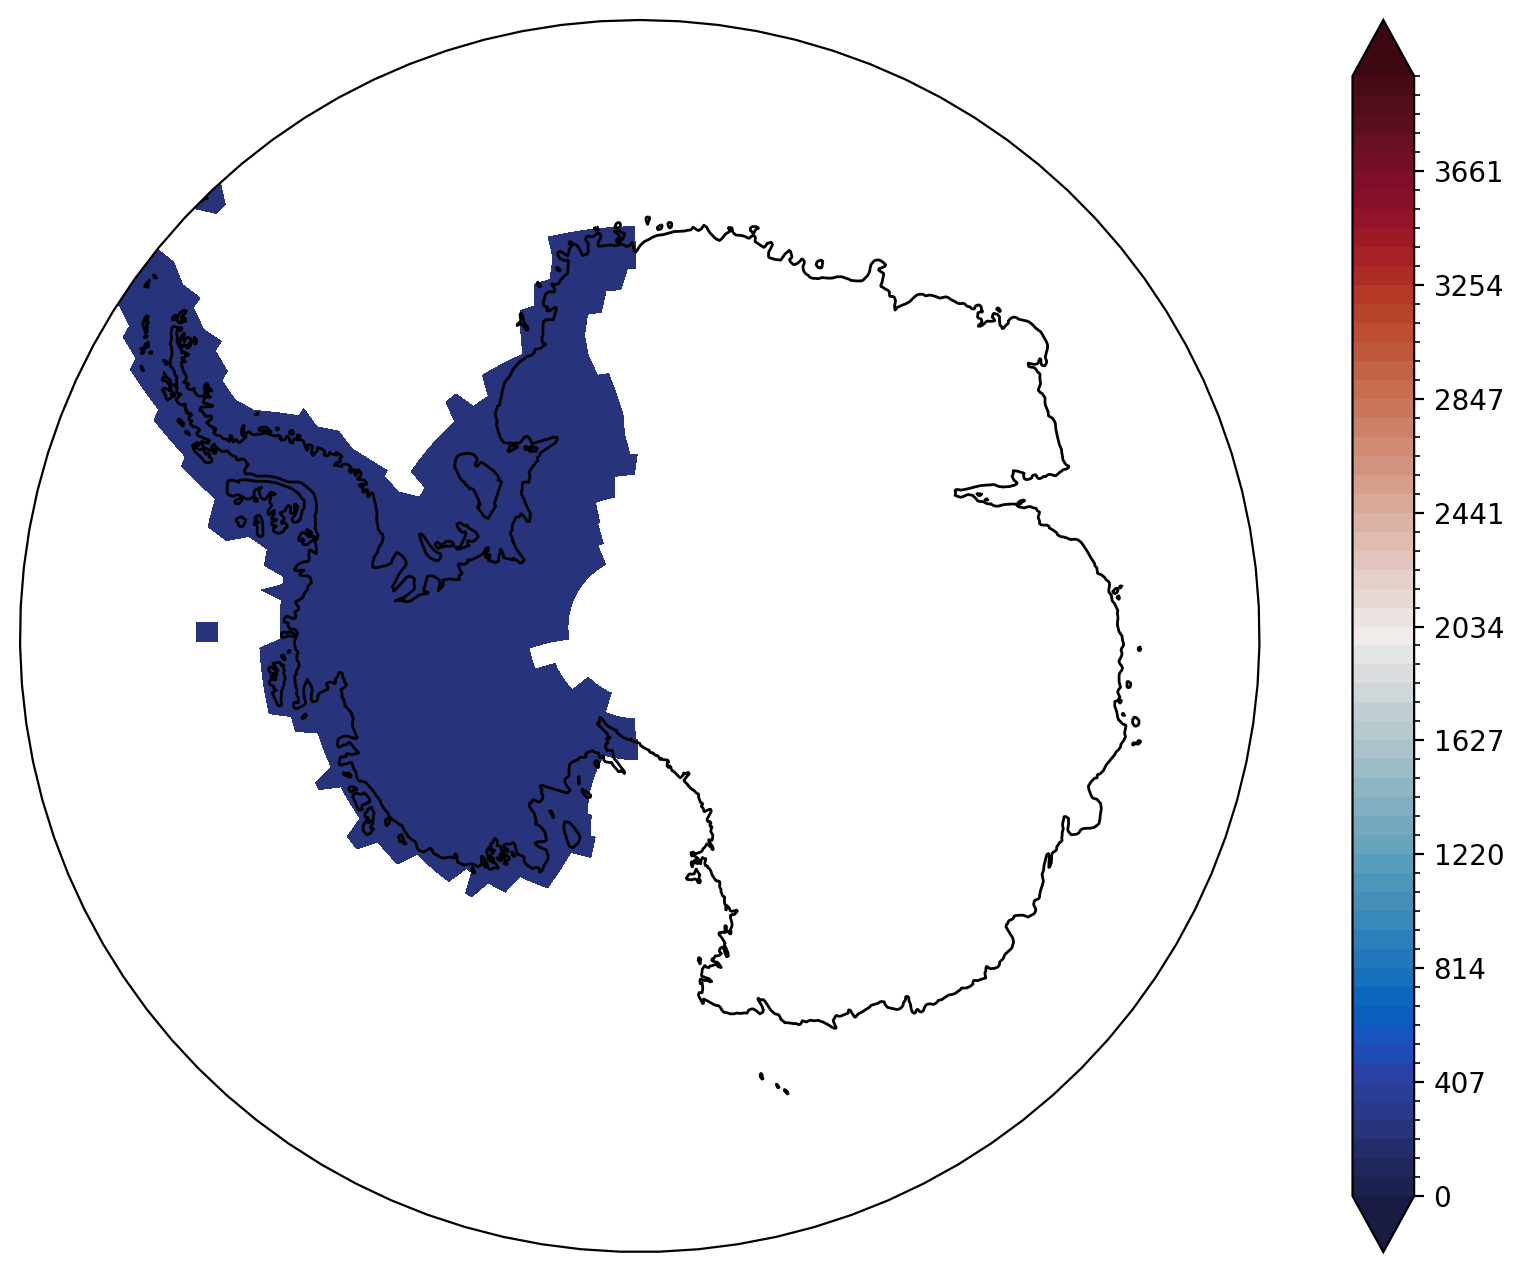

In [15]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_test.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

The code above produces a plot of all of Antarctica with just the low west region colored as we specified we want temperature data only on the region marked as low west.